# Initialization

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Modification

In [4]:
# turn Sex into binary variable: Sex = 1 means male; Sex = 0 means female
# turn Embarked into 3 binary variables using one-hot encoding: C/Q/S = 1 iff the passenger embarked on C/Q/S
replace_list = {'Sex': {'male':1, 'female':0}}
train = train.replace(replace_list)
train = pd.concat((train,pd.get_dummies(train['Embarked'])),axis=1)
train = train.drop(['PassengerId'],1)

# add a column called Family which sums up the number of siblings, spouses, parents and children
train['Family'] = train['SibSp'] + train['Parch']

# extract every passenger's prefix (eg: Mr, Mrs, etc.)
train['Name'] = train.Name.str.split(r'\s*,\s*|\s*\.\s*').str[1]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  C         891 non-null    uint8  
 12  Q         891 non-null    uint8  
 13  S         891 non-null    uint8  
 14  Family    891 non-null    int64  
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 86.3+ KB


In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,Family
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S,0,0,1,1
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [6]:
# remove dtype = 'object' columns and use the rest of the info to plot correlation heatmap
train_no_obj = train.select_dtypes(exclude=['object'])
train_no_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   C         891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
 10  Family    891 non-null    int64  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


# Data Visualization and Analysis

<AxesSubplot:>

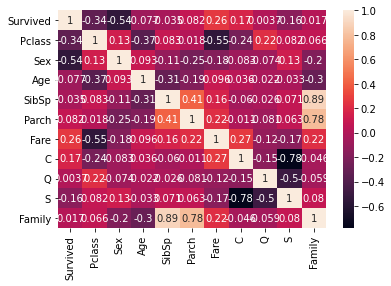

In [7]:
corr = train_no_obj.corr()
sns.heatmap(corr, annot=True)
# keeping all other variables constant, survival rate is highly correlated with sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

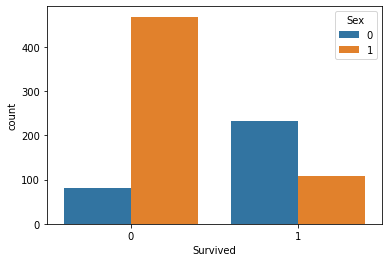

In [8]:
sns.countplot(x='Survived',hue='Sex',data = train)
# males are more likely to survive than females (i.e.: Pr(Survival=1|Sex=1) > Pr(Survival=1|Sex=0))

<AxesSubplot:xlabel='Survived', ylabel='count'>

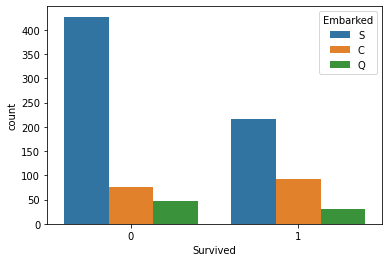

In [9]:
sns.countplot(x='Survived', hue='Embarked', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

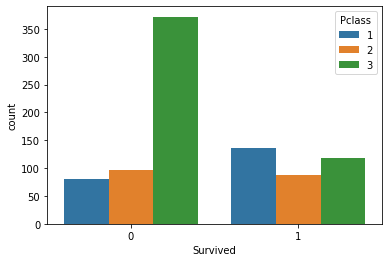

In [10]:
sns.countplot(x='Survived',hue='Pclass',data = train)
# 1st class people are most likely to survive, followed by 2nd class people. 
# Only about 1/4 of 3rd class people get to survive.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

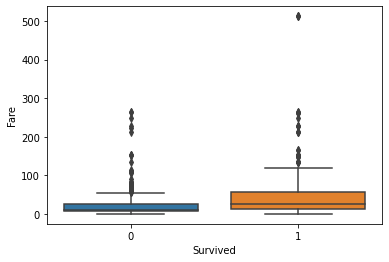

In [11]:
sns.boxplot(x='Survived', y='Fare', data = train)
# those who purchase more expensive fares are more likely to survive

<AxesSubplot:xlabel='Survived', ylabel='Age'>

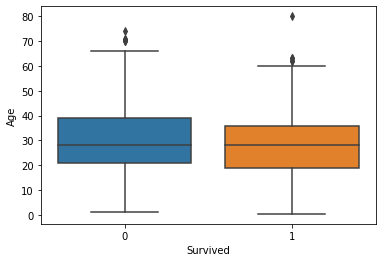

In [12]:
sns.boxplot(x='Survived', y='Age', data = train)
# one's survival rate is not much influenced by his/her age

<AxesSubplot:xlabel='Survived', ylabel='count'>

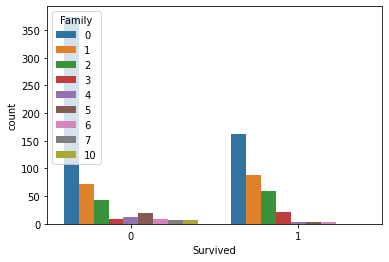

In [13]:
sns.countplot(x='Survived',hue='Family',data = train)
# those who has 1 to 3 family members are more likely to survive than people with 0 or >4 family members

In [14]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Capt              1
Lady              1
Sir               1
Don               1
Jonkheer          1
Mme               1
the Countess      1
Name: Name, dtype: int64

In [15]:
title_replace = {'Name': {'Mlle': 'Others',
                         'Col':'Others',
                         'Major': 'Others',
                         'Sir': 'Others',
                         'Don': 'Others',
                         'the Countess': 'Others',
                         'Mme': 'Others',
                         'Capt': 'Others',
                         'Ms': 'Others',
                         'Jonkheer': 'Others',
                         'Lady': 'Others',}}
train = train.replace(title_replace)

In [16]:
train['Name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     14
Dr          7
Rev         6
Name: Name, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

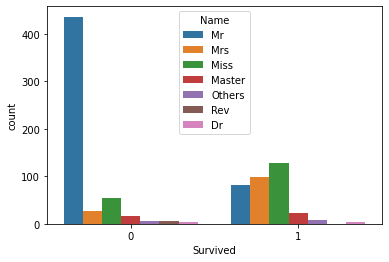

In [17]:
sns.countplot(x='Survived',hue='Name',data = train)
# people with titles 'Mrs' or 'Miss' are more likely to survive

In [18]:
train['Cabin'] = train['Cabin'].notnull().astype(int)
train.head()
# Cabin = 1 means the passenger is assigned to a cabin class

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,Family
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,0,S,0,0,1,1
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,1,C,1,0,0,1
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,1,0
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,1,S,0,0,1,1
4,0,3,Mr,1,35.0,0,0,373450,8.0500,0,S,0,0,1,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

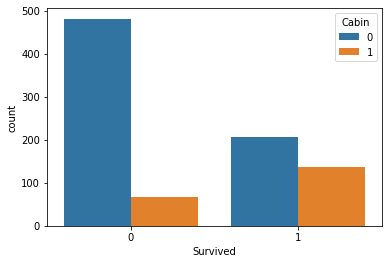

In [19]:
sns.countplot(x='Survived',hue='Cabin',data = train)
# passengers assigned to a cabin class are more likely to survive

# Machine Learning Setup

In [20]:
y = train['Survived']
train = train.select_dtypes(exclude=['object'])
train = train.drop(['Family','Survived','Age'],1)
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   Cabin   891 non-null    int64  
 6   C       891 non-null    uint8  
 7   Q       891 non-null    uint8  
 8   S       891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB


In [21]:
train = train.to_numpy()
train

array([[3., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [3., 0., 0., ..., 0., 0., 1.],
       ...,
       [3., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [3., 1., 0., ..., 0., 1., 0.]])

In [22]:
y = y.to_numpy()
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [23]:
from sklearn.neighbors import KNeighborsClassifier

n = len(train)
k = 10 # k-fold cross-validation approach
min_error = np.inf
min_kk = -1
min_nn = -1

for kk in range(k):
    X_validate = train[(int)(n/k*kk):(int)(n/k*(kk+1))] # validation set
    X_train = np.concatenate((train[0:(int)(n/k*kk)], train[(int)(n/k*(kk+1)):n]), axis=0)
    y_validate = y[(int)(n/k*kk):(int)(n/k*(kk+1))]
    y_train = np.concatenate((y[0:(int)(n/k*kk)], y[(int)(n/k*(kk+1)):n]), axis=0)

    for nn in range(1, 15): # try different depths
        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_validate)
        error = np.sum(y_pred != y_validate)/len(y_validate)
        if (error < min_error):
            min_error = error
            min_kk = kk
            min_nn = nn
    
print(min_error, min_kk, min_nn)

0.15730337078651685 4 3


In [24]:
X_validate = train[(int)(n/k*min_kk):(int)(n/k*(min_kk+1))] # validation set
X_train = np.concatenate((train[0:(int)(n/k*min_kk)], train[(int)(n/k*(min_kk+1)):n]), axis=0)
y_validate = y[(int)(n/k*min_kk):(int)(n/k*(min_kk+1))]
y_train = np.concatenate((y[0:(int)(n/k*min_kk)], y[(int)(n/k*(min_kk+1)):n]), axis=0)

model = KNeighborsClassifier(n_neighbors=min_nn)
model.fit(train,y)

KNeighborsClassifier(n_neighbors=3)

# Test Set Prediction

In [25]:
test = test.replace(replace_list)
test = pd.concat((test,pd.get_dummies(test['Embarked'])),axis=1)
test['Cabin'] = test['Cabin'].notnull().astype(int)
test = test.select_dtypes(exclude=['object'])

submission = test['PassengerId']
submission = submission.to_frame()
submission.info()

test = test.drop(['PassengerId', 'Age'],1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   Cabin   418 non-null    int64  
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
 8   S       418 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 20.9 KB


In [26]:
test['Fare'] = test['Fare'].fillna(0) # ensure no NaN values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   Cabin   418 non-null    int64  
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
 8   S       418 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 20.9 KB


In [27]:
test = test.to_numpy()
test

array([[3., 1., 0., ..., 0., 1., 0.],
       [3., 0., 1., ..., 0., 0., 1.],
       [2., 1., 0., ..., 0., 1., 0.],
       ...,
       [3., 1., 0., ..., 0., 0., 1.],
       [3., 1., 0., ..., 0., 0., 1.],
       [3., 1., 1., ..., 1., 0., 0.]])

In [28]:
model = KNeighborsClassifier(n_neighbors=min_nn)
model.fit(train,y)
test_pred = model.predict(test)

In [29]:
submission_y = pd.DataFrame(test_pred, columns = ['Survived'])
submission.insert(1, 'Survived',submission_y)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
submission.to_csv('submission.csv',index=False)